# Linear Regression

Linear Regression is a supervised learning technique, used in regression tasks. It is the most classic and simple technique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

w[0]: 0.393906  b: -0.031804


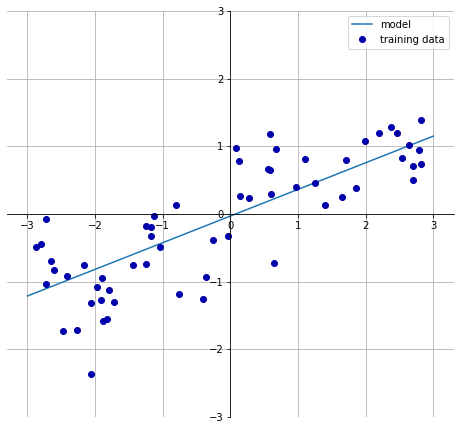

In [2]:
mglearn.plots.plot_linear_regression_wave()

## Data

The Boston data frame has 14 columns. We need to predict the median value of homes, i.e. **medv** 

This data frame contains the following columns:

    crim: per capita crime rate by town.
    zn: proportion of residential land zoned for lots over 25,000 sq.ft.
    indus: proportion of non-retail business acres per town.
    chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    nox: nitrogen oxides concentration (parts per 10 million).
    rm: average number of rooms per dwelling.
    age: proportion of owner-occupied units built prior to 1940.
    dis: weighted mean of distances to five Boston employment centres.
    rad: index of accessibility to radial highways.
    tax: full-value property-tax rate per /10000 dollars
    ptratio: pupil-teacher ratio by town.
    black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
    lstat: lower status of the population (percent).
    medv: median value of owner-occupied homes in /1000$

In [3]:
df = pd.read_csv('boston_data.csv',index_col=0)

In [5]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


## Visualization

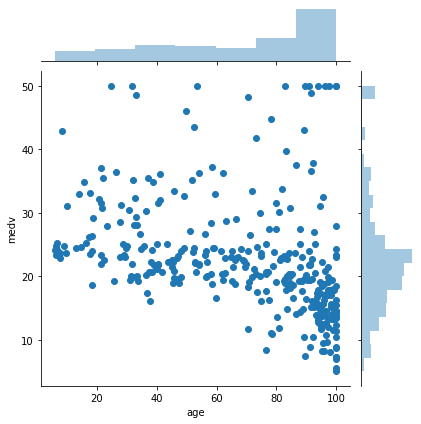

In [8]:
sns.jointplot('age','medv',data=df)

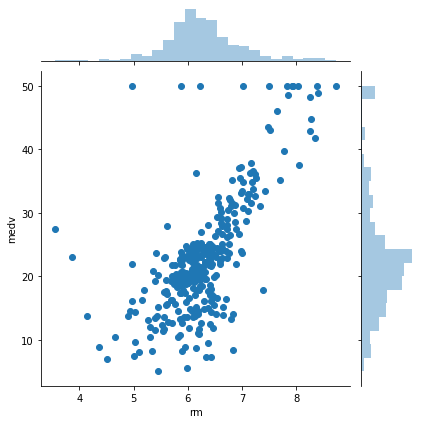

In [9]:
sns.jointplot('rm','medv',df)

we can see that medv is highly correlated with rm

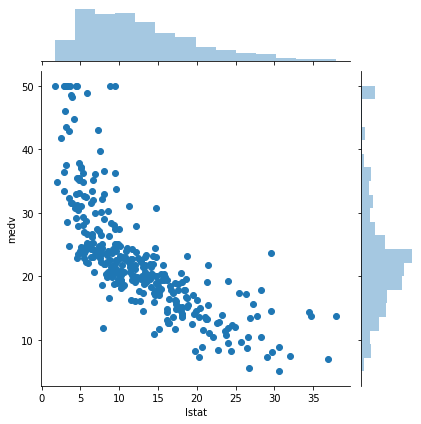

In [10]:
sns.jointplot('lstat','medv',df)

We can see for the lower values of lstat , medv is also decreasing

## Model

Let's build our model by importing it from sklearn library

In [11]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()     #initializing the model

In [13]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


### Split the data

We need to split the data in train and test set to evaluate how our model is doing with the new data.

In [14]:
X = df.drop('medv',axis=1)
y = df['medv']

In [16]:
y.head()

ID
1    24.0
2    21.6
4    33.4
5    36.2
7    22.9
Name: medv, dtype: float64

We dropped the **medv** for X, since it's the target variable and we want to predict it.

In [90]:
from sklearn.model_selection import train_test_split

In [88]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Training the model
Now we can train the linear regression on train set

In [94]:
model = LinearRegression()     #initializing the model

TypeError: __init__() got an unexpected keyword argument 'C'

In [89]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction

In [23]:
pred = model.predict(X_test)

In [24]:
pred

array([24.50141484, 23.35218616, 22.56081814, 33.27103664, 24.39179151,
       14.38881491, 17.58440531, 30.22482519, 16.3814254 , 25.75001663,
       25.95089381, 19.28314443, 20.40895745, 34.25669378, 21.96702176,
       34.11284465, 22.27120348, 16.98697062, 24.94339935, 16.91612324,
       35.99655208, 31.47377712, 23.19704537, 28.31771819, 15.95754574,
       41.80363869,  7.41212947,  1.23819578, 31.13731355, 10.43444587,
       19.36636029, 20.71859579, 27.04099002, 14.66393284, 19.12266966,
       12.29750678, 27.99251079,  4.41875062, 16.59733342, 22.59503327,
       23.5632186 , 21.51633999, 25.34424208, 39.23942244, 35.91224412,
       20.90286402, 10.94306131, 20.84527047, 13.75217322, 20.60415019,
       12.92310307, 28.70264392, 22.47376743, 12.8564295 , 33.7942933 ,
        0.94447788, 19.55892129, 26.68148037, 25.22660633, 28.78595944,
       18.10361954, 24.30249917, 18.18357009, 27.31291419, 22.9791363 ,
       17.13583443, 26.03089024])

## Model Evaluation

In [25]:
model.score(X_train,y_train)

0.7256305671670327

In [26]:
model.score(X_test,y_test)

0.7390315860425432

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

23.48673519542588

## Scaling\

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler() # initializing

In [30]:
X_train= scaler.fit_transform(X_train,y_train)

In [31]:
X_train

array([[-0.43566892, -0.47770707, -0.852503  , ...,  0.80858773,
         0.42052006, -0.3762768 ],
       [-0.42239133, -0.47770707, -0.15916158, ..., -0.32145257,
         0.39152789, -0.29535425],
       [ 0.21395232, -0.47770707,  1.00455876, ...,  0.80858773,
        -3.77642989,  0.83611634],
       ...,
       [-0.2575645 , -0.47770707,  1.21745198, ..., -1.78108795,
        -0.10121766, -0.85458685],
       [ 3.14415287, -0.47770707,  1.00455876, ...,  0.80858773,
        -2.84916573,  2.06585003],
       [-0.21417344, -0.47770707,  1.21745198, ..., -1.78108795,
         0.12817225,  0.25376302]])

In [32]:
X_test = scaler.transform(X_test)

In [33]:
X_test

array([[-4.21232428e-01, -4.77707071e-01, -6.05086557e-01,
        -2.52982213e-01, -9.28530119e-01, -8.50677649e-02,
        -2.16746628e+00,  9.93350290e-01, -7.52918064e-01,
        -1.01859821e+00, -2.74367553e-01,  3.90921360e-01,
        -7.08637256e-01],
       [ 1.15216083e-01, -4.77707071e-01,  1.00455876e+00,
        -2.52982213e-01, -2.15054816e-01, -5.94156388e-02,
         8.17027305e-01, -3.20914179e-01,  1.66420855e+00,
         1.54325580e+00,  8.08587730e-01,  4.01474995e-01,
         7.60224292e-02],
       [-4.25566555e-01, -4.77707071e-01, -3.67739392e-01,
        -2.52982213e-01, -3.16979860e-01,  2.89738300e-01,
         1.04387717e+00, -6.54994833e-01, -5.22715530e-01,
        -1.25203391e-01,  1.13818282e+00,  4.00383239e-01,
        -1.06802984e-02],
       [-4.38271606e-01,  2.85746566e+00, -8.87026219e-01,
        -2.52982213e-01, -1.24279900e+00,  5.12056726e-01,
        -1.56844084e+00,  6.90451834e-01, -6.37816797e-01,
        -9.47599944e-01,  3.37737607e

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
pred = model.predict(X_test)

In [37]:
model.score(X_train,y_train)

0.7256305671670327

In [38]:
model.score(X_test,y_test)

0.739031586042544

In [41]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
crim,-0.052489
zn,0.047445
indus,0.053855
chas,3.784864
nox,-15.739657
rm,3.768832
age,-0.004627
dis,-1.548823
rad,0.328967
tax,-0.012866


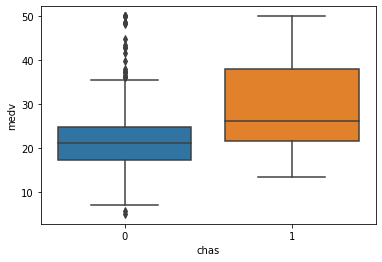

In [42]:
sns.boxplot('chas','medv',data=df)

In [43]:
df['nox'].value_counts()

0.713    14
0.538    14
0.437    12
0.605    11
0.871    10
         ..
0.518     1
0.415     1
0.442     1
0.445     1
0.389     1
Name: nox, Length: 77, dtype: int64

## Polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
a=PolynomialFeatures() # initialize

In [70]:
temp=df[['crim']]

In [80]:
X_train.shape

(266, 13)

In [81]:
X_train = a.fit_transform(X_train)

In [82]:
X_train.shape

(266, 105)

In [83]:
l = LinearRegression()

In [84]:
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
l.score(X_train,y_train)

0.9448424325894028

In [86]:
X_test = a.transform(X_test)

In [87]:
l.score(X_test,y_test)

0.6173224859270292

In [71]:
a=PolynomialFeatures()

In [72]:
temp.shape

(333, 1)

In [73]:
temp_2 = a.fit_transform(temp)

In [77]:
pd.DataFrame(temp_2)#.shape

,0,1,2
0,1.0,0.00632,0.000040
1,1.0,0.02731,0.000746
2,1.0,0.03237,0.001048
3,1.0,0.06905,0.004768
4,1.0,0.08829,0.007795
...,...,...,...
328,1.0,0.17783,0.031624
329,1.0,0.06263,0.003923
330,1.0,0.04527,0.002049
331,1.0,0.06076,0.003692


In [76]:
temp

,crim
ID,
1,0.00632
2,0.02731
4,0.03237
5,0.06905
7,0.08829
...,...
500,0.17783
502,0.06263
503,0.04527
